Exploring data with Python - visualize data

In [1]:
import pandas as pd
df = pd.read_csv('datos2.csv')
print(df)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


In [2]:
df_students = df

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)
print(passes)
#Devuelve False para los que no cumplen y True para los que cumplen

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool


In [3]:
# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


Visualizing data with Matplotlib

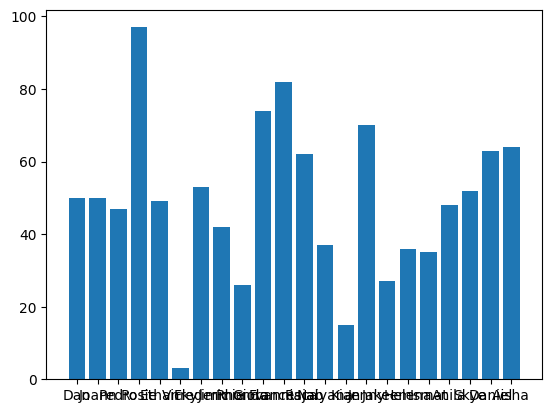

In [4]:
#Let's start with a simple bar chart that shows the grade of each student.
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

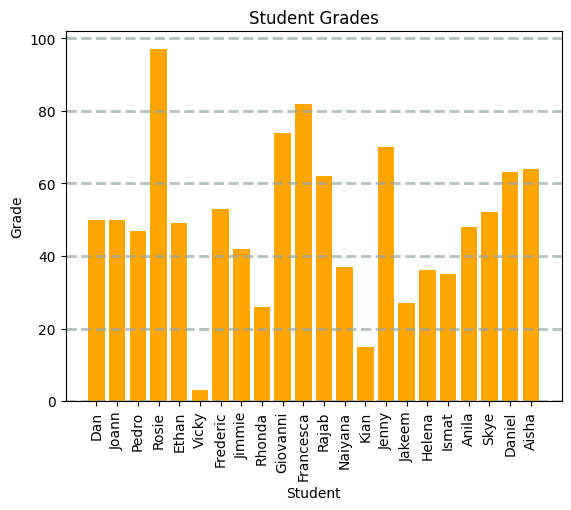

In [5]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

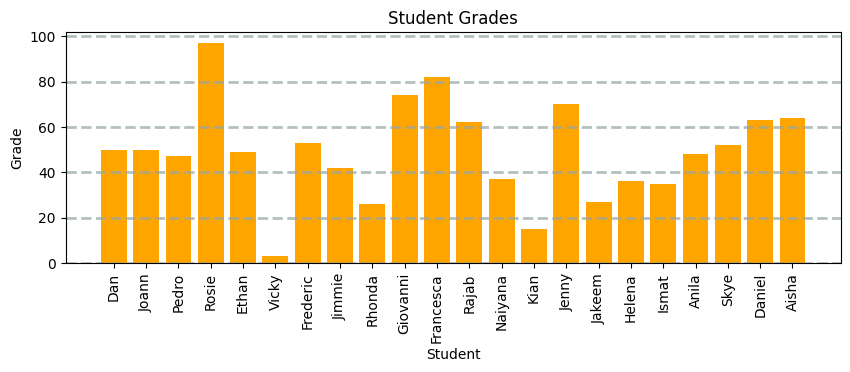

In [6]:
# Create a Figure with a specific size.
fig = plt.figure(figsize=(10,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

C:\Users\Cristian Valiante\AppData\Local\Temp\ipykernel_7948\3082256890.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\Cristian Valiante\AppData\Local\Temp\ipykernel_7948\3082256890.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


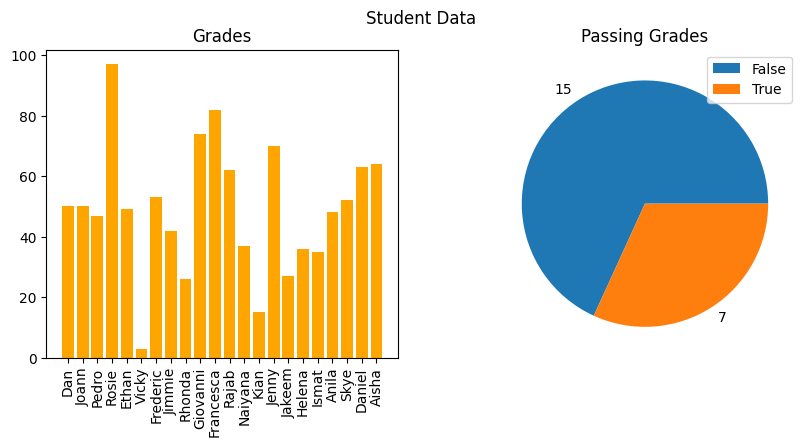

In [9]:
#A figure can contain multiple subplots, each on its own axis.
#For example, the following code creates a figure with two subplots: one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

<Axes: xlabel='Name'>

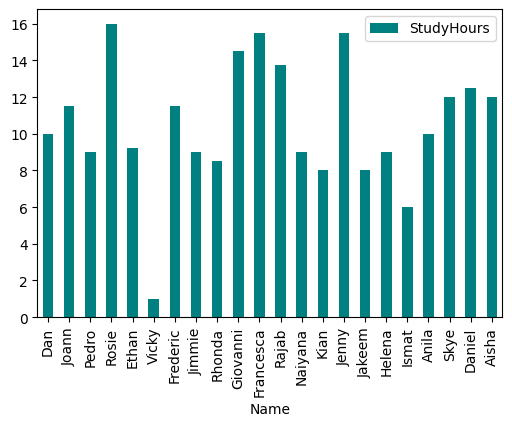

In [8]:
#Ploting data with dataframe
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))